In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #To ignore warnings

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns
#Have Loan status as target variable

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns
#doesn't have target variable

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes
#object as categorical, int and float are numeric

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True) #Print proportions

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

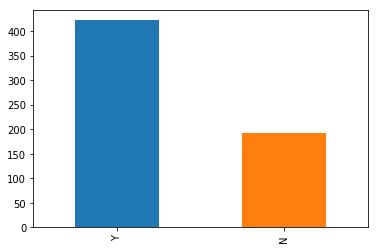

In [11]:
train['Loan_Status'].value_counts().plot.bar()

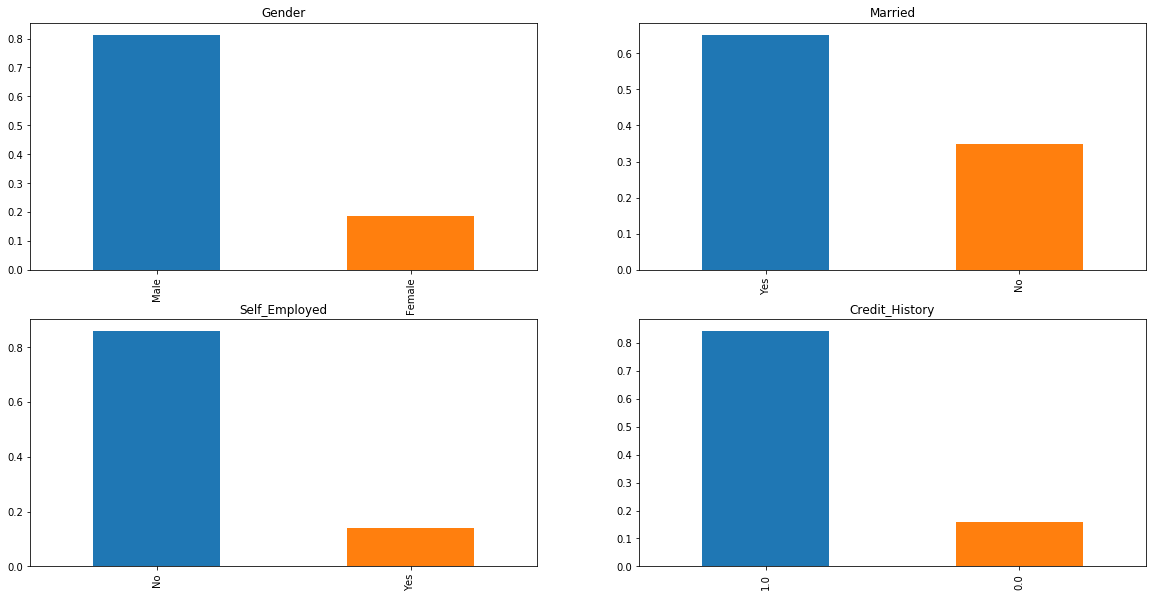

In [12]:
### Univariate analysis ###

plt.figure(1),plt.subplot(221), train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Gender')
plt.subplot(222) ,train['Married'].value_counts(normalize=True).plot.bar(title = 'Married')
plt.subplot(223) ,train['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self_Employed')
plt.subplot(224) ,train['Credit_History'].value_counts(normalize=True).plot.bar(title = 'Credit_History')
plt.show()

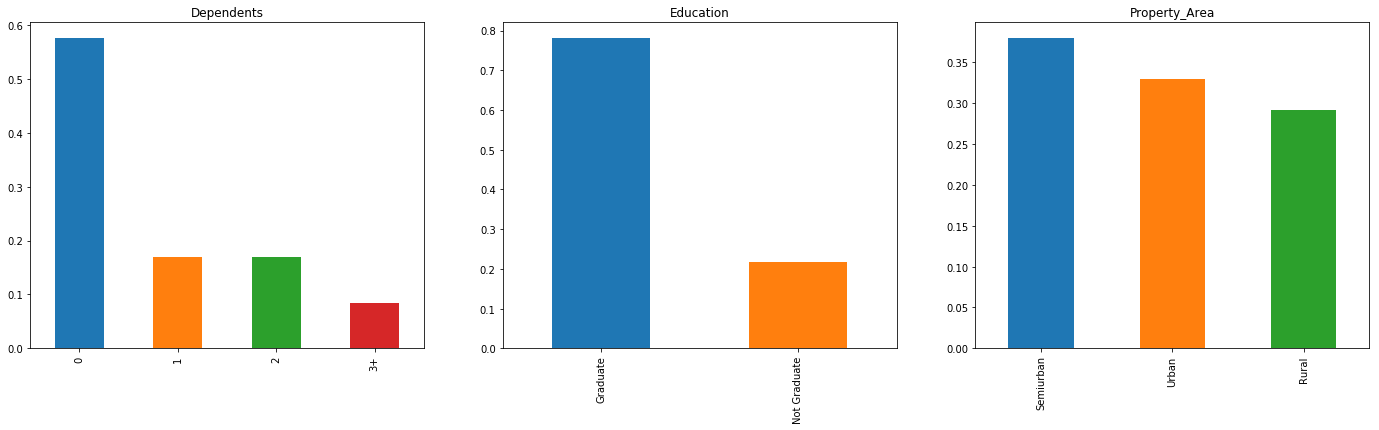

In [13]:
plt.figure(1),plt.subplot(131), train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title = 'Dependents')
plt.subplot(132) ,train['Education'].value_counts(normalize=True).plot.bar(title = 'Education')
plt.subplot(133) ,train['Property_Area'].value_counts(normalize=True).plot.bar(title = 'Property_Area')
plt.show()

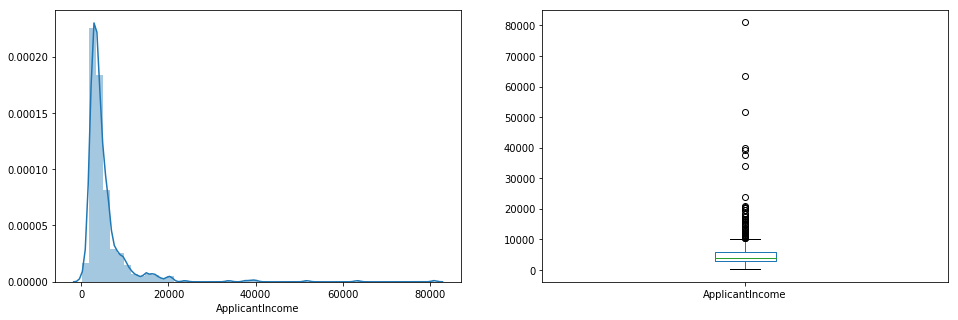

In [14]:
plt.figure(1),plt.subplot(121), sns.distplot(train['ApplicantIncome']);
plt.subplot(122), train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [15]:
###Data is not normally distributed and there are outliers ain applicant incom section
#Which sows income disparity in the customers 

(<matplotlib.axes._subplots.AxesSubplot at 0x1cfa10198d0>, Text(0.5,0.98,''))

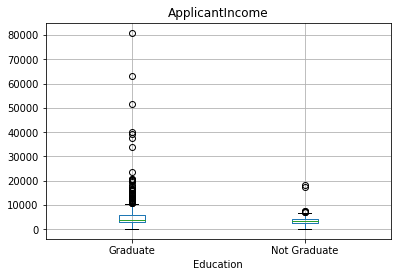

In [16]:
#Now segregate them by education
train.boxplot(column='ApplicantIncome', by = 'Education'), plt.suptitle("")
#higher number of graduates with very high income are outliers

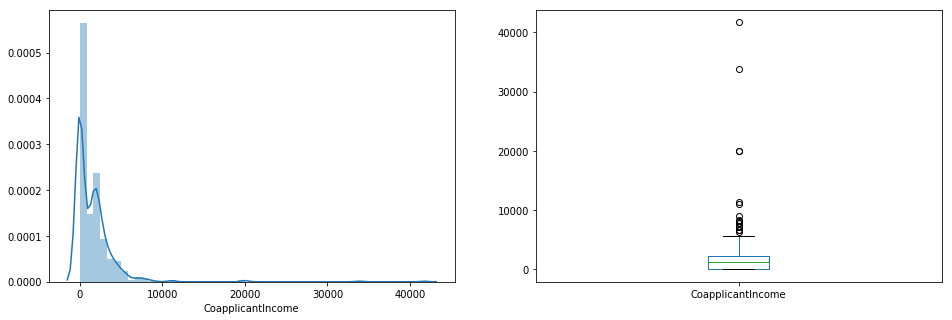

In [17]:
plt.figure(1),plt.subplot(121), sns.distplot(train['CoapplicantIncome']);
plt.subplot(122), train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()
#most coapplicants have 5000 income and not normally disributed

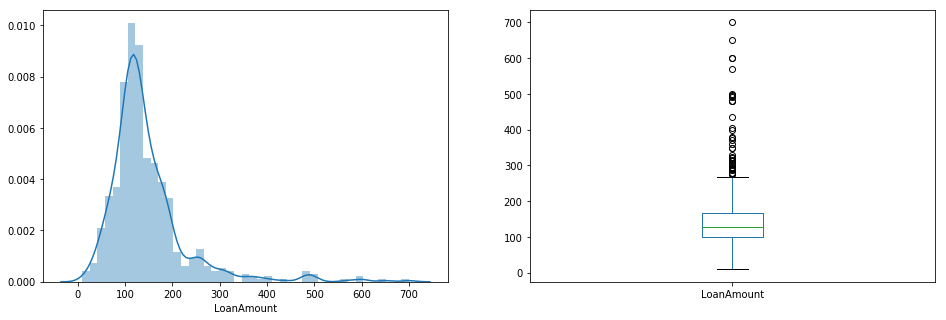

In [18]:
train.LoanAmount.dropna(inplace=True)
plt.figure(1),plt.subplot(121),sns.distplot(train['LoanAmount']);
plt.subplot(122), train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()
### Distribution is normal but outliers are there

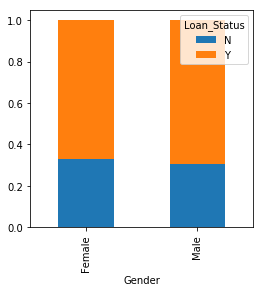

In [19]:
### Bivariate analysis ###
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

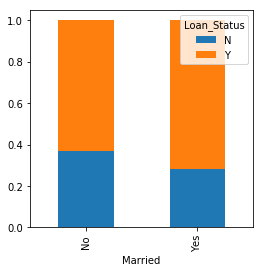

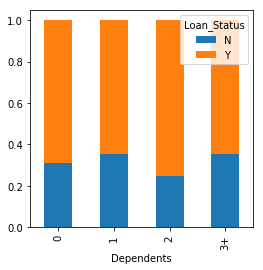

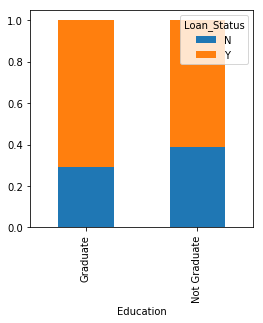

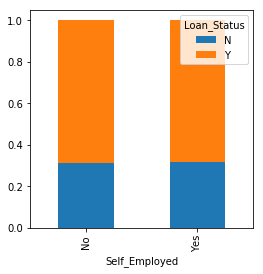

In [20]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

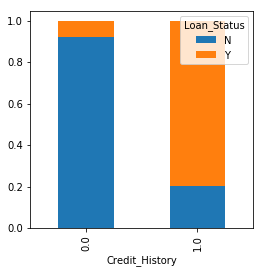

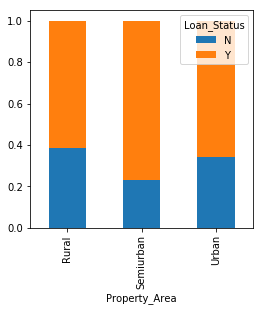

In [21]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

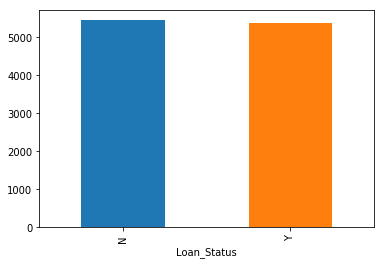

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0,0.5,'percentage')

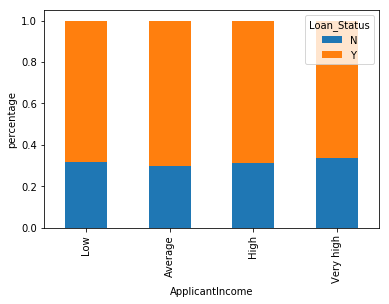

In [23]:
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('percentage')

Text(0,0.5,'percentage')

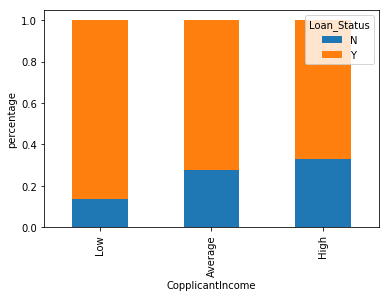

In [24]:
bins = [0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True)
plt.xlabel('CopplicantIncome')
plt.ylabel('percentage')

Text(0,0.5,'percentage')

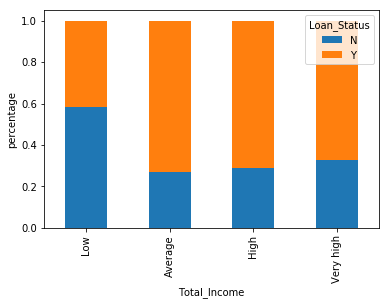

In [25]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('percentage')

Text(0,0.5,'percentage')

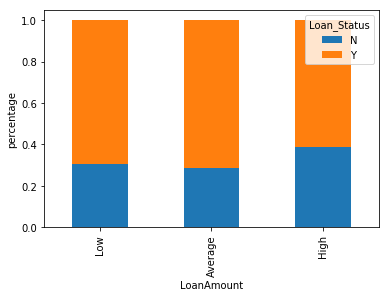

In [26]:
bins = [0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis = 0).plot(kind='bar', stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('percentage')

In [27]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [28]:
train['Dependents'].replace(['3+'],3,inplace=True)
test['Dependents'].replace(['3+'],3,inplace=True)
train['Loan_Status'].replace(['N'],0,inplace=True)
train['Loan_Status'].replace(['y'],1,inplace=True)

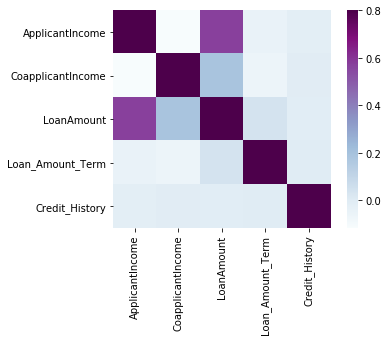

In [29]:
matrix = train.corr()
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu');

In [30]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [32]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [35]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [37]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [38]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

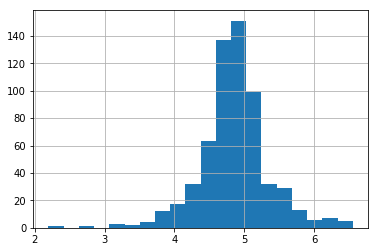

In [40]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

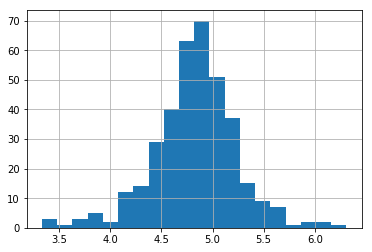

In [41]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

In [42]:
train = train.drop('Loan_ID',axis=1)

In [43]:
test = test.drop('Loan_ID',axis=1)

In [44]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [45]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
y = y.replace(to_replace=['N', 'Y'], value=[0, 1])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
pred_cv = model.predict(x_cv)

In [50]:
accuracy_score(y_cv,pred_cv)

0.8

In [51]:
pred_test = model.predict(test)

In [52]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")

In [53]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [54]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [55]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('mlogistic.csv',index=False)

In [56]:
#Checking and simplifying model building as to get efficient prediction.

In [57]:
from sklearn.model_selection import StratifiedKFold

In [59]:
i=1
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


In [60]:
#The mean validation accuracy for this model turns out to be 0.81. now visualize the roc curve

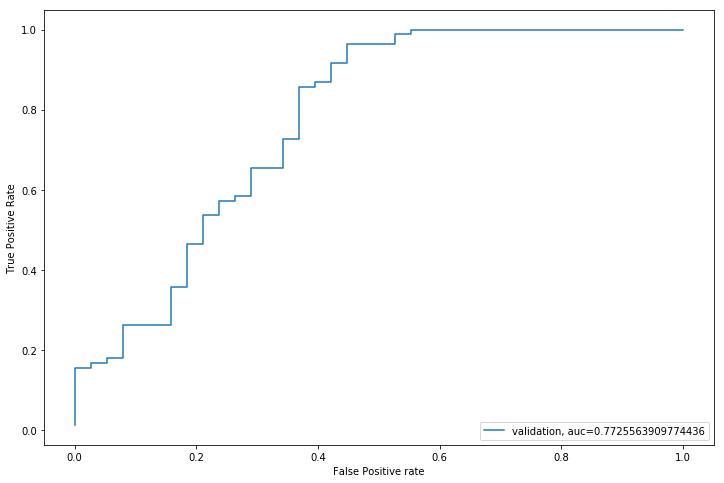

In [65]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [66]:
#we got auc vale of 0.77

In [68]:
submission['Loan_Status']=pred_test
submission['loan_ID']=test_original['Loan_ID']

In [69]:
#changing y n to 1 0
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [72]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('mlogistic_k.csv',index=False)

In [73]:
#Now feature Engineering comes to play where we create 3 new features
#TotalIncom,EMI,BalanceIncome

In [74]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

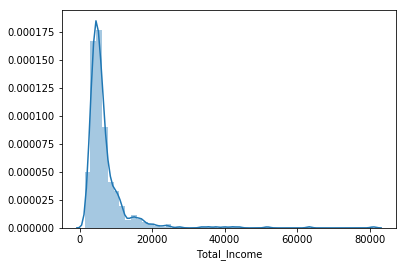

In [75]:
sns.distplot(train['Total_Income'])

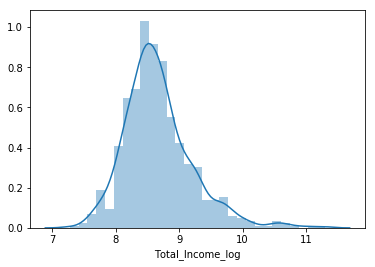

In [76]:
#It is right skewed so apply log transformation
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log']=np.log(test['Total_Income'])

In [77]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

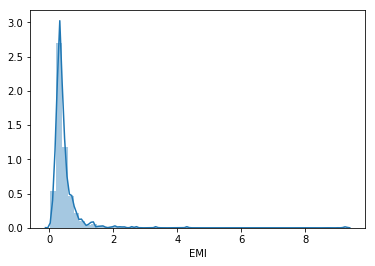

In [78]:
sns.distplot(train['EMI'])

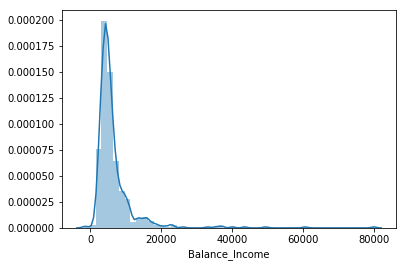

In [79]:
#Balance income feature. *1000 to make units equal.
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income']);

In [80]:
#Drop the variables used to create new features because of correlation between them
#Also remove noise and unwanted data.

In [82]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

KeyError: "['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'] not found in axis"

In [83]:
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [84]:
###After feature creating we will move onto model buiding process
#logistic regression
#Decision Tree
#random forest
#XGBoost

In [91]:
from sklearn import tree

In [92]:
i=1
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.6451612903225806

2 of kfold 5
accuracy_score 0.6854838709677419

3 of kfold 5
accuracy_score 0.6639344262295082

4 of kfold 5
accuracy_score 0.6639344262295082

5 of kfold 5
accuracy_score 0.7049180327868853


In [93]:
#The mean validation accuracy of this model is 0.67

In [94]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [95]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [96]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('DEcision Tree.csv',index=False)

In [99]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [100]:
i=1
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.7661290322580645

3 of kfold 5
accuracy_score 0.7704918032786885

4 of kfold 5
accuracy_score 0.7540983606557377

5 of kfold 5
accuracy_score 0.7950819672131147


In [102]:
#The mean validation accuracy of model is 0.77
#Now we will try to improve accuracy by tuning the hyperparameters for this model.
#Grid Search is used here.
#max_depth = max depth of Tree
#n_estimators = number of trees used.

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
##provide range for max depth from 1 to 20 with interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

In [106]:
paramgrid = {'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,202,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)

In [108]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
#estimating optimized value

In [110]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [111]:
i=1
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=1,n_estimators=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


In [112]:
#the mean val score is 0.81

In [113]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv',index=False)

In [114]:
#Now find the feature importance

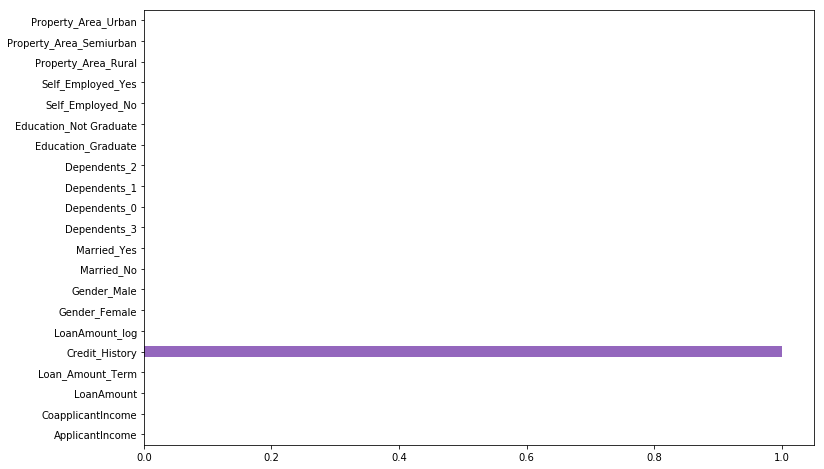

In [118]:
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

In [119]:
#XGBOOST

In [120]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'